In [68]:
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d

sns.set_style('whitegrid')

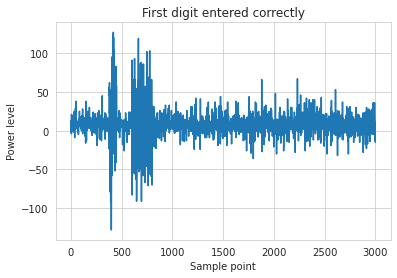

In [95]:
TRACE_LEN = 3000
KEY_LEN = 300
SPACE = 100

DIST = lambda: np.random.normal(scale=.1,size=3000)

def plot_spa(pin_correct = 1, title="First digit entered correctly"):
    base = DIST()
    base += .15 * np.sin(np.arange(0, 1, 1/TRACE_LEN))
    base *= .5 * DIST()

    end = 0
    base[375:450] += .33 * DIST()[375:450]
    for correct in range(pin_correct):
        start = (correct * KEY_LEN + SPACE) + 500
        end = start + 200

        base[start:end] += .33 * DIST()[start:end]

    if pin_correct >= 4:
        base[end:] *= 2.5 * np.sin(np.arange(0, 1, 1/TRACE_LEN))[end:]
        base[end:] += .01 * np.sin(np.arange(0, 1, 1/TRACE_LEN))[end:]

    # Convert to uint8
    def conv_uint8(trace):
        m = interp1d([min(trace), max(trace)], [-128, 127])
        return m(trace).astype(np.int8)

    g = sns.lineplot(data=conv_uint8(base))
    g.set(ylabel="Power level", xlabel="Sample point", title=title)

plot_spa()

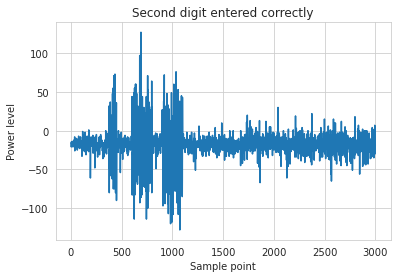

In [99]:
plot_spa(2, "Second digit entered correctly")

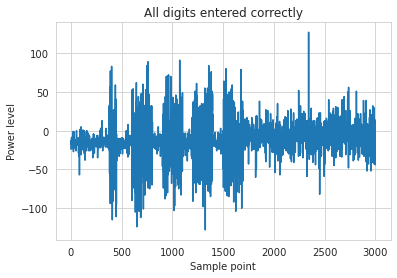

In [98]:
plot_spa(4, "All digits entered correctly")